# Exploratory Data Analysis

## Table of Contents

- 1. [Problem Statement](#section1)<br>
- 2. [Data Loading and Description](#section2)
- 3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Data Normalization](#section303)<br/>
    - 3.4 [Preprocessing](#section304)<br/>
    - 3.5 [Post Profiling](#section305)<br/>
- 4. [Questions](#section4)
    - 4.1 [How are the restaurants serviced by Zomato spread across the globe?](#section401)<br/>
    - 4.2 [Which cuisines are popular across the restaurants covered by Zomato?](#section402)<br/>
    - 4.3 [How Zomato users have rated the restaurants?](#section403)<br/>
    - 4.4 [Does restaurant's services affect their ratings?](#section404)<br/>
    - 4.5 [Does number of votes affect restaurant's ratings?](#section405)<br/>
    - 4.6 [How user have rated the Indian restaurants?](#section406)<br/>
    - 4.7 [How users have rated cuisines served in the Indian restaurants?](#section407)<br/>
    - 4.8 [Does restaurant's service impact cost?](#section408)<br/>
    - 4.9 [Does cost impact restaurant's rating?](#section409)<br/>
- 5. [Conclusions](#section5)<br/>  

<a id=section1></a>
### 1. Problem Statement <img src="https://github.com/nazneenansari/dataset/blob/master/Zomato1.jpg?raw=true" width="500" height="300" />

Zomato is an online platform that is responsible for powering amazing dining experiences for the users daily both in home and whilst dining out.Over 10 years Zomato has steadily built both a search and discovery platform that fuels stable and growing transaction businesses.It provides information and reviews of restaurants, including images of menus where the restaurant does not have its own website and also offers service like online delivery and reservation.

The intention behind this analysis is to study how the sales and ratings are affected by different factors like Location, Cuisine, Services provided by restaurants, etc and what is specifically dominating in an area concentrating more towards Indian market.

__Data Source : www.kaggle.com__

### 2. Data Loading and Description <a id=section2></a>

<a id=section201></a>
- The data was collected using the Zomato API and has information about the Restaurant name, Location, Cuisine, Ratings and other demographics wherein each restaurant is identified uniquely by an ID 
- The dataset comprises of __9551 observations of 21 columns__. Below is a table showing names of all the columns and their description.

         
| Column Name         | Description                                 |
|:-:: | :-:                    |               
| Restaurant Id       | Unique id of every restaurant               | 
| Restaurant Name     | Name of the restaurant                      |  
| Country Code        | Country in which restaurant is located      | 
| City                | City in which restaurant is located         |   
| Address             | Address of the restaurant                   |                           
| Locality            | Location in the city                        |
| Locality Verbose    | Detailed description of the locality        |
| Longitude           | Longitude coordinate                        |                      
| Latitude            | Latitude coordinate                         |
| Cuisines            | Cuisines offered by the restaurant          |
| Average Cost for two| Cost for two people in different currencies |
| Currency            | Currency of the country                     |
| Has Table Booking   | Can you reserve a table?                    |
| Has Online Delivery | Do they deliver at your doorstep?           |
| Is Delivering Now   | Is the Restaurant delivering food now?      |
| Switch to order menu| Switch to order menu ?                      |
| Price range         | Range of price of food                      |
| Aggregate Rating    | Average rating out of 5                     |
| Rating Color        | Depending upon the average rating color     |
| Rating Text         | Text on the basis of rating                 |
| Votes               | Number of ratings casted by people          |

#### Importing packages                                          

In [2]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
from subprocess import check_output
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

from wordcloud import WordCloud
from collections import Counter
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to display with a horizontal scroll instead of hiding the middle columns

#### Importing the Dataset

In [26]:
zomato_data= pd.read_csv('https://raw.githubusercontent.com/nazneenansari/dataset/master/zomato.csv' , encoding='Latin-1')   # Importing training dataset using pd.read_csv

### 3. Data Profiling <a id=section3></a>

### 3.1 Understanding the Dataset <a id=section301></a>

In [8]:
zomato_data.shape                                                 # This will print the number of rows and comlumns of the Data Frame

Zomato data has __9551 rows__ and __21 columns.__

In [77]:
zomato_data.columns                                   # This will print the names of all columns.

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'price_range',
       'aggregate_rating', 'rating_color', 'rating_text', 'votes',
       'rating_bin'],
      dtype='object')

In [5]:
zomato_data.head()

In [5]:
zomato_data.tail()                                        # This will print the last n rows of the Data Frame

In [6]:
zomato_data.info()                                         # This will give Index, Datatype and Memory information

In [ ]:
zomato_data.describe()

In [ ]:
zomato_data.isnull().sum()

From the above output we can see that all the columns has data and there is no null data.

### 3.2 Pre Profiling <a id=section302></a>

In [4]:
profile = pandas_profiling.ProfileReport(zomato_data)
profile.to_file(outputfile="zomato_before_preprocessing.html")

### 3.3 Data Normalization <a id=section303></a>

### 3.3.1 Standardize all column headers to lower case and '_' separated

In [51]:
zomato_data.columns = zomato_data.columns.str.replace(" ", "_")
zomato_data.columns = zomato_data.columns.str.lower()

### 3.4 Preprocessing <a id=section304></a>

- Dealing with missing values<br/>
    - Dropping the column __'Switch to order menu'__ as it has constant value __No__.
  

In [52]:
zomato_data.drop('switch_to_order_menu', axis = 1,inplace = True)

### 3.5 Post Pandas Profiling <a id=section305></a>

In [53]:
profile = pandas_profiling.ProfileReport(zomato_data)
profile.to_file(outputfile="zomato_after_preprocessing.html")

### 4. Questions <a id=section4></a>

### 4.1 How are the restaurants serviced by Zomato spread across the globe ? <a id=section401></a>

- Using Plotly Scattergeo

In [54]:
#!pip install plotly 

username = <<Enter UserName>>
apikey = <<Enter API Key>>
plotly.tools.set_credentials_file(username=username, api_key=apikey)
#help(go.Scattergeo())
df=zomato_data
data = [ go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['restaurant_name']+"\n"+df['locality']+"\n"+df['rating_text'],
        mode = 'markers',
        marker = dict( 
            size = 5, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'circle',
            cmin = 0,
            color = df['aggregate_rating'],
            cmax = df['aggregate_rating'].max(),
            colorbar=dict(
                title="Aggregate Rating",
                thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)"
            
            )
        ))]

layout_world=dict(

        title = 'Zomato Distribution across the World',
        geo = dict(
            scope = 'world',
            projection=dict( type='equirectangular' ),
            showland = True,
            landcolor = "white",
            countrywidth = 0.7,
            subunitwidth = 0.5
        ),
    ) 

fig = go.Figure(data=data, layout = layout_world)
py.iplot(fig, filename ='Zomato Distribution across the World')

The above visualization shows a comparative study of restaurants covered by Zomato worldwide. It is pretty evident that Zomato has it’s major concentration in __India followed by the United States Of America__.

- Using barh to study distribution in India

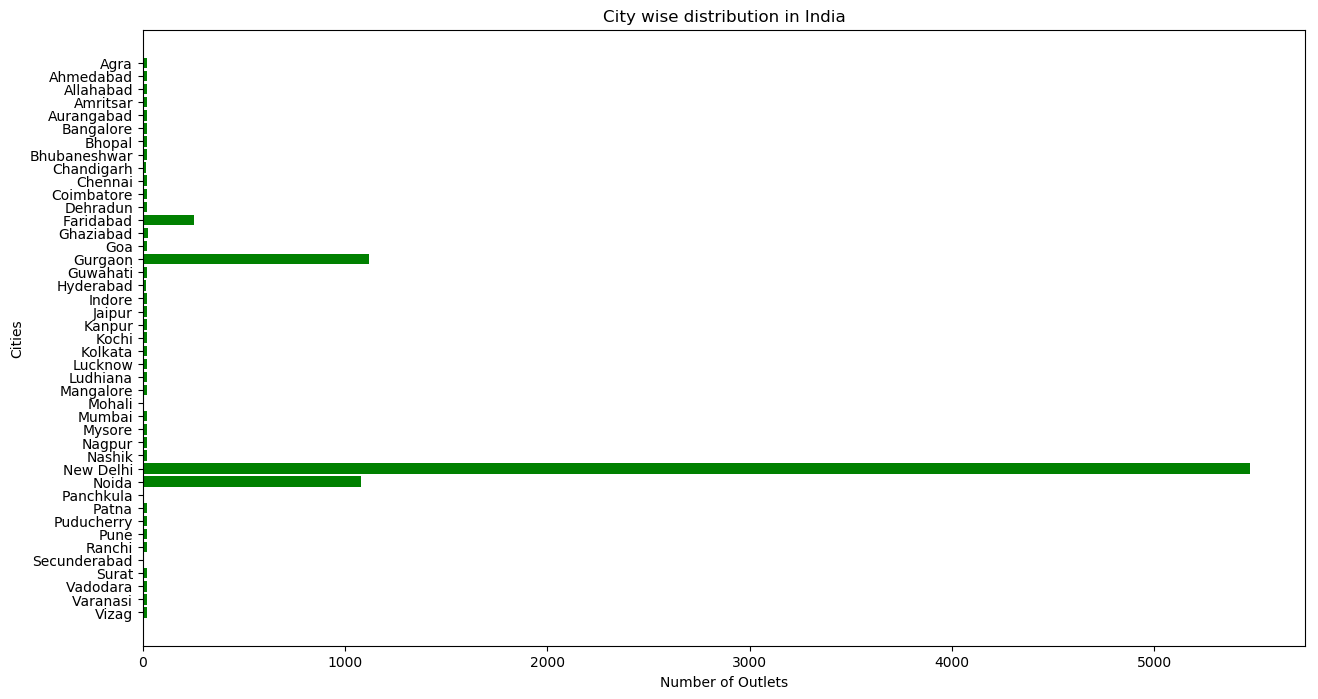

In [74]:
#!pip install matplotlib

plt.rcdefaults()
fig, ax = plt.subplots()

# x and y axis data
india_data=zomato_data[zomato_data['country_code']==1]
cities = india_data['city'].unique()
noOfOutlets = india_data.groupby('city').size()

ax.barh(cities, noOfOutlets, align='center',color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Cities')
ax.set_xlabel('Number of Outlets')
ax.set_title('City wise distribution in India')

fig.set_size_inches(15, 8 ,forward=True)
fig.savefig('F:\\Zomato_CityWise_Distribution.png', dpi=100)
plt.show()


Notice that in India, Zomato has majorly focused on Restaurants in the northern part with it’s prime location being National Capital Region of India.

### 4.2 Which cuisines are popular across the restaurants covered by Zomato?<a id=section402></a>

- Using Word Cloud

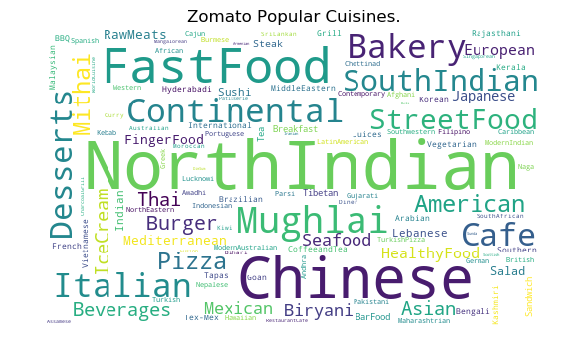

In [56]:
#!pip install wordcloud
#pip install Counter

df_cuisines = zomato_data.cuisines.str.split(",", expand=False)

cuisines = []
for content in df_cuisines:
    if (type(content) is list or type(content) is str ):
        result = [s.replace(" ", "") for s in content]
        cuisines = cuisines + result

counts = Counter(cuisines)

# Create and generate a word cloud image:
wordcloud = WordCloud(width =500 , height=300 ,background_color ='white', max_words=500, font_step=1).generate_from_frequencies(counts)

# Display the generated image: 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title('Zomato Popular Cuisines.') 
plt.savefig('F:\\Zomato_Popular_Cusines', dpi =100)
plt.show()


Through this visualization we have predicted the popularity of cuisines across all the restaurants and since the maximum restaurants are from India, the popular cuisine turned out to be __North Indian__ cuisine , followed by __Chinese__ and __Fast Food__.

### 4.3 How Zomato users have rated the restaurants?<a id=section403></a>

- Using Pie Chart

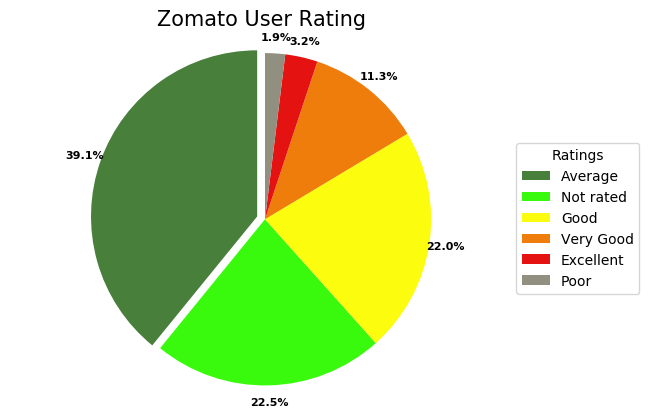

In [65]:
labels = zomato_data['rating_text']
counts = Counter(labels)
sorted_values=dict(counts.most_common())
list_keys = [ k for k in sorted_values ]
list_values = [ v for v in sorted_values.values() ]

explode = (0.5, 0, 0, 0, 0, 0)                # only "explode" the 1st slice 
colors =('#487f3b','#39f90c','#fcfc0f','#ef7d0b','#e51212','#918f7f')
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(list_values, explode=explode,colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90, radius = 10 , pctdistance = 1.1)
ax.axis('equal')                     # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(wedges, list_keys, title="Ratings",loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Zomato User Rating' , fontdict={'fontsize': 15})
fig.savefig('F:\\Zomato_Rating_Pie.png', dpi=100)
plt.setp(autotexts, size=8, weight="bold")
plt.show()

While Zomato has a lot of users rating the restaurants, it seems like the majority of people have rated restaurants to be __Average or Good__ and only a few have rated beyond Good. We also observe that approx __22%__ of the user have not rated the restaurants.

### 4.4 Does restaurant's services affect their ratings?<a id=section404></a>

- Using Count Plot 

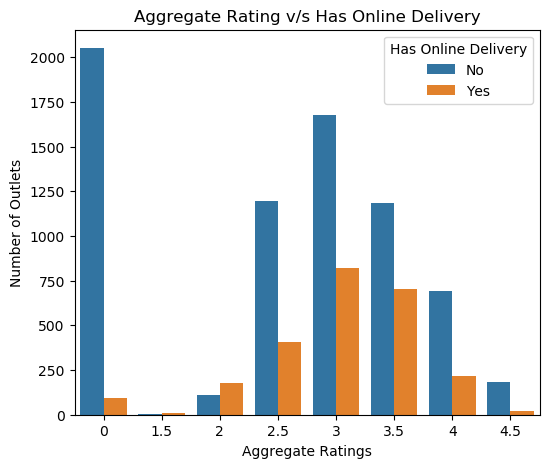

In [80]:
df['rating_bin'] = pd.cut(zomato_data['aggregate_rating'].dropna(),
                         [0,1.5,2,2.5,3,3.5,4,4.5,5],
                         labels=['0','1.5','2','2.5','3','3.5','4','4.5'], include_lowest=True)

fig,ax =plt.subplots(figsize=(6,5))
ax= sns.countplot(data = zomato_data, x = 'rating_bin', hue='has_online_delivery')
ax.legend(title="Has Online Delivery" )
ax.set(xlabel='Aggregate Ratings', ylabel='Number of Outlets')
plt.title('Aggregate Rating v/s Has Online Delivery')
plt.show()

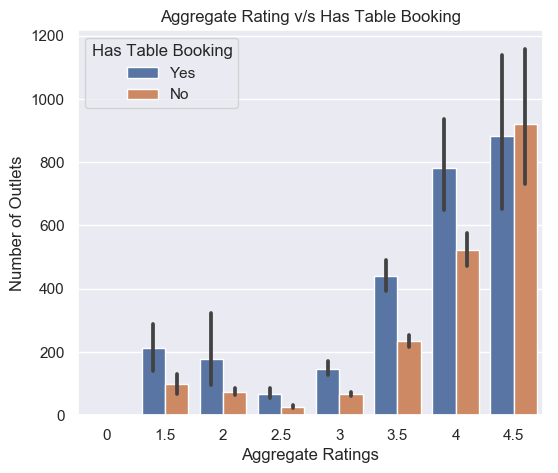

In [234]:
fig,ax =plt.subplots(figsize=(6,5))
ax= sns.countplot(data = zomato_data, x = 'rating_bin', hue='has_table_booking')
ax.legend(title="Has Table Booking" )
ax.set(xlabel='Aggregate Ratings', ylabel='Number of Outlets')
plt.title('Aggregate Rating v/s Has Table Booking')
plt.show()

From the above graphs it is clearly visible that no matter whether a restaurant offer online order/table booking, the ratings __remain constant and are not affected much by these services.__

### 4.5 Does number of votes affect restaurant's ratings?<a id=section405></a>

Understand the vote distribution

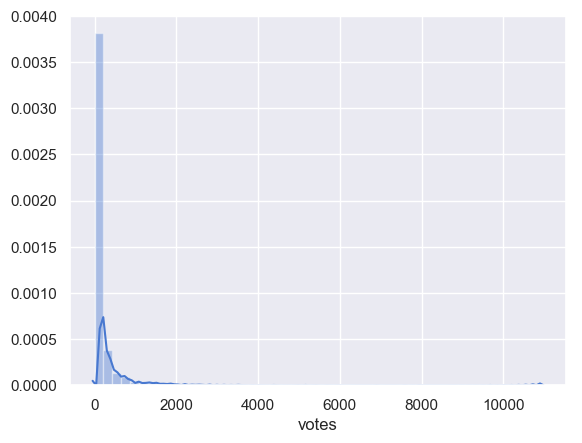

In [82]:
sns.set(color_codes=True)                       
sns.set_palette(sns.color_palette("muted"))
sns.distplot(zomato_data['votes'].dropna());

From the above distribution , we see that majority of the votes lies between __0 and 500__. So we will focus on votes from 0 to 500.

- Using Count Plot

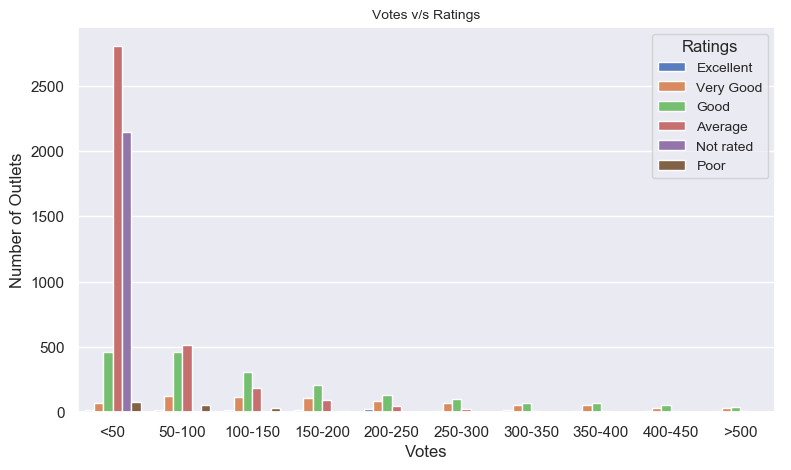

In [107]:
votes= zomato_data[zomato_data['votes'] < 500]
votes['vote_bin'] = pd.cut(votes['votes'].dropna(),
                         [0, 50,100,150,200,250,300,350,400,450,500],
                         labels=['<50','50-100','100-150','150-200','200-250','250-300', '300-350', '350-400','400-450', '>500'], include_lowest=True)
#print(votes)
fig,ax =plt.subplots(figsize=(9,5))
ax=sns.countplot(data = votes, x = 'vote_bin', hue= 'rating_text')
plt.legend(loc='upper right' , title='Ratings', fontsize='small')
ax.set(xlabel='Votes', ylabel='Number of Outlets')
plt.title('Votes v/s Ratings' , fontsize=10)
plt.show()

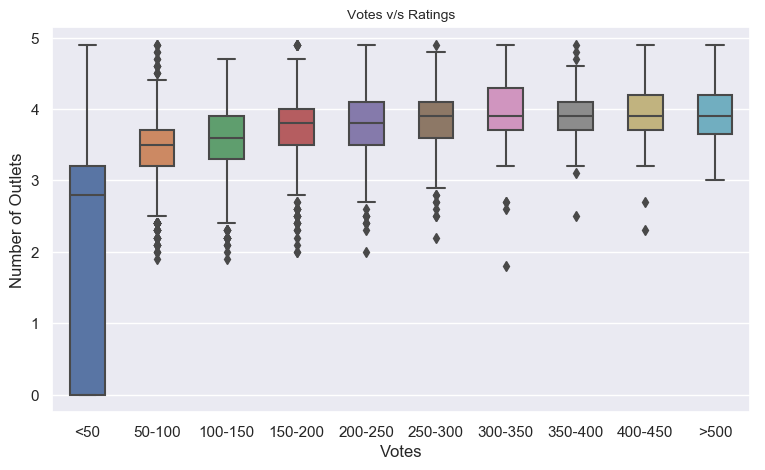

In [233]:
fig,ax =plt.subplots(figsize=(9,5))
ax=sns.boxplot(data = votes, x = 'vote_bin',y='aggregate_rating', width= 0.5)
ax.set(xlabel='Votes', ylabel='Aggregate Ratings')
plt.title('Votes v/s Ratings' , fontsize=10)
plt.show()

From the above graph we can see that not many people have voted.__Majority users have voted as Average__. There are few restaurant with higher votes.We also notice that with increase in the number vote ,the average aggregate rating of the restaurants improves.

### 4.6 How user have rated the Indian restaurants?<a id=section406></a>

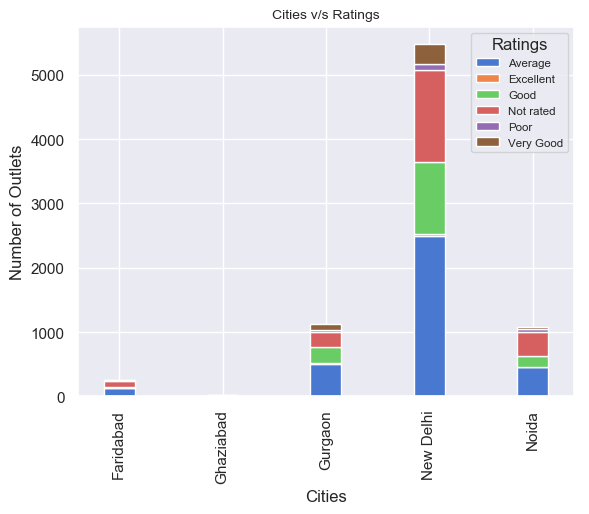

In [109]:
df1 = zomato_data[zomato_data['country_code']==1].groupby(['city'])['city'].size().nlargest(5)
df2 = zomato_data[zomato_data['city'].isin(dict(df1).keys())].groupby(['city','rating_text']).size().reset_index().pivot(columns='rating_text', index='city' , values=0).fillna(0)

ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.3)
ax.legend(title= 'Ratings' ,  fontsize='x-small')
ax.set(xlabel='Cities', ylabel='Number of Outlets')
plt.title('Cities v/s Ratings' , fontsize=10)
plt.show()

From the above graph it can be seen that a significant amount of restaurants in the top 5 cities of India serviced by Zomato have not been rated and almost 50% of the restaurants have been rated as average by the users.

### 4.7 How users have rated cuisines served in the Indian restaurants?<a id=section407></a>

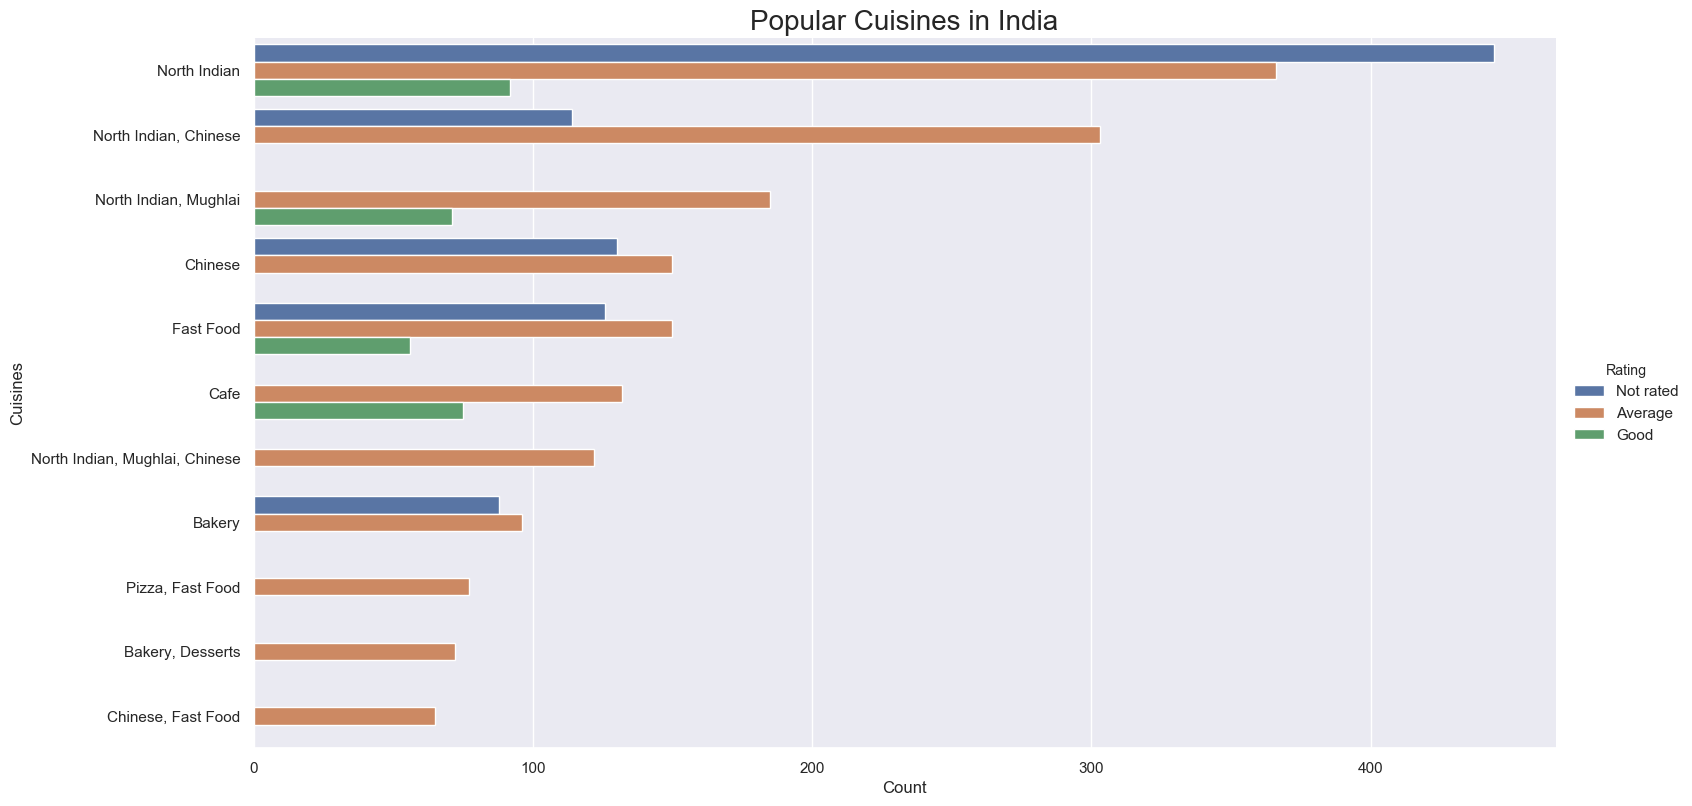

In [198]:

df1= zomato_data[zomato_data['country_code']==1].groupby(['cuisines','rating_text']).size().to_frame('count').reset_index().nlargest(20, columns='count')
sns.set(rc={'figure.figsize':(15.7,15.27)})
g=sns.catplot(x= 'count' , y ='cuisines', hue='rating_text', kind="bar",data=df1 , height =8 , aspect =2);
g._legend.set_title('Rating')
g.set(xlabel= 'Count', ylabel ='Cuisines')
plt.title('Popular Cuisines in India' , fontsize= 20)
plt.show()


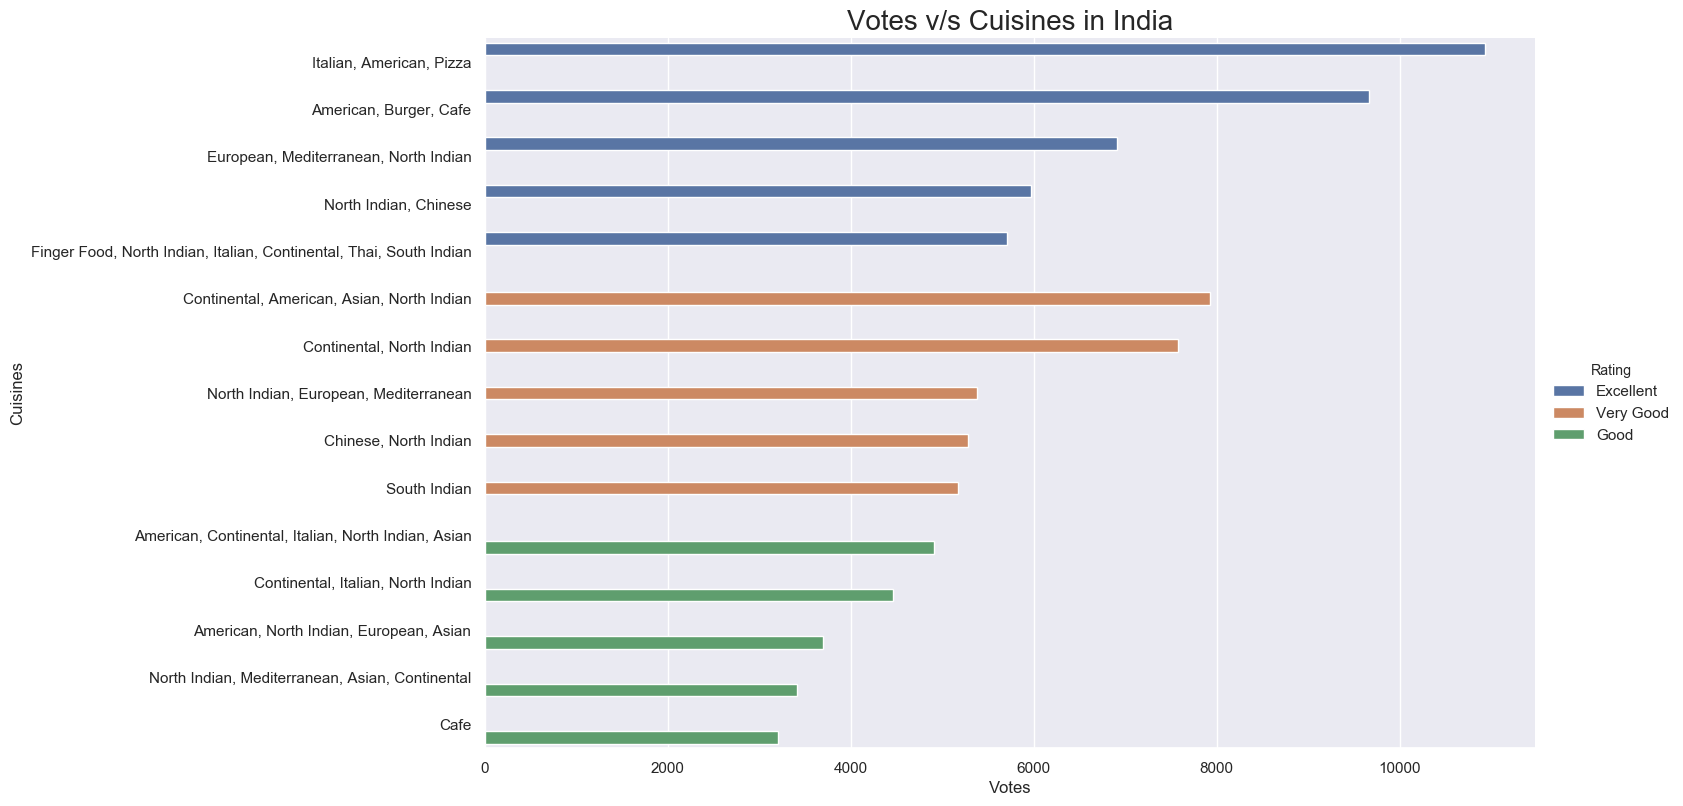

In [194]:
df2 =zomato_data[ df['country_code'] ==1]
df3 = df2[df2['rating_text'] == 'Excellent'].groupby(['cuisines' , 'votes' , 'rating_text'])['rating_text'].size().to_frame('count').reset_index().nlargest(5 , columns='votes')
df4 = df2[df2['rating_text'] == 'Very Good'].groupby(['cuisines' , 'votes', 'rating_text'])['rating_text'].size().to_frame('count').reset_index().nlargest(5 , columns='votes')
df5 = df2[df2['rating_text'] == 'Good'].groupby(['cuisines' , 'votes', 'rating_text'])['rating_text'].size().to_frame('count').reset_index().nlargest(5 , columns='votes')

df6=pd.concat([df3, df4, df5], axis=0).reset_index()
sns.set(rc={'figure.figsize':(11.7,12.0)})
g=sns.catplot(x="votes", y="cuisines", hue='rating_text', kind="bar", data=df6, height=8 , aspect=2, legend=True);
g._legend.set_title('Rating')
g.set(xlabel= 'Votes', ylabel ='Cuisines')
plt.title('Votes v/s Cuisines in India' , fontsize= 20)
plt.show()


### 4.8 Does restaurant's service impact cost?<a id=section408></a>

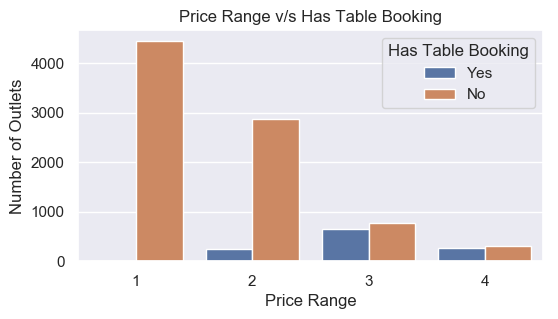

In [217]:
fig,ax =plt.subplots(figsize=(6,3))
ax= sns.countplot(data = zomato_data, x = 'price_range', hue='has_table_booking')
ax.legend(title="Has Table Booking" )
ax.set(xlabel='Price Range', ylabel='Number of Outlets')
plt.title('Price Range v/s Has Table Booking')
plt.show()

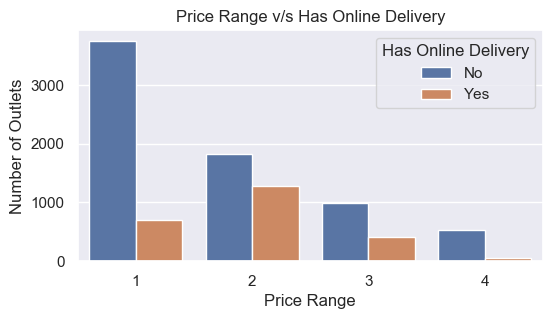

In [211]:
fig,ax =plt.subplots(figsize=(6,3))
ax= sns.countplot(data = zomato_data, x = 'price_range', hue='has_online_delivery')
ax.legend(title="Has Online Delivery" )
ax.set(xlabel='Price Range', ylabel='Number of Outlets')
plt.title('Price Range v/s Has Online Delivery')
plt.show()

From the above two  graphs it is clearly visible that the __sales are affected by the Online Delivery service__ provided by the restaurants. Also, majority of people prefer making __table reservation for expensive restaurants.__

### 4.9 Does cost impact restaurant's rating?<a id=section409></a>

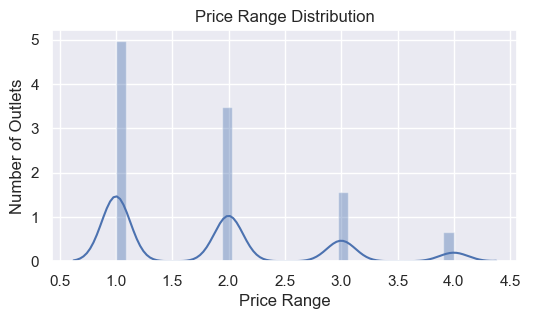

In [221]:
fig,ax =plt.subplots(figsize=(6,3))
ax= sns.distplot(zomato_data['price_range'].dropna())
ax.set(xlabel='Price Range', ylabel='Number of Outlets')
plt.title('Price Range Distribution')
plt.show()

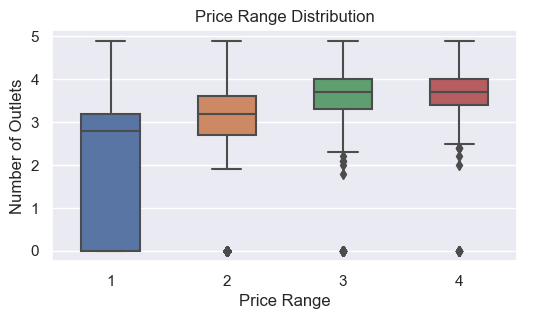

In [225]:
fig,ax =plt.subplots(figsize=(6,3))
ax= sns.boxplot(x='price_range', y ='aggregate_rating',data=zomato_data ,width=0.5)
ax.set(xlabel='Price Range', ylabel='Aggregate Rating')
plt.title('Price Range v/s Aggregate Rating')
plt.show()

From the above graph, we can see that majority people prefer going to restaurants which are in low range. Also, the rating more or less remain within the same range for all the expensive restaurants. The average of aggregate rating seems to be increasing with the price range considering fewer people have rated the  expensive restaurants.

### 4.10 Does services impact restaurant's rating?<a id=section409></a>

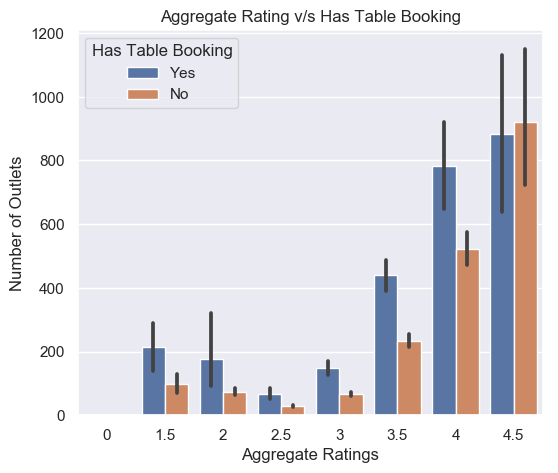

In [235]:
fig,ax =plt.subplots(figsize=(6,5))
ax= sns.barplot(data = zomato_data, x = 'rating_bin', y='votes', hue='has_table_booking')
ax.legend(title="Has Table Booking" )
ax.set(xlabel='Aggregate Ratings(Bin)', ylabel='Votes')
plt.title('Aggregate Rating v/s Has Table Booking')
plt.show()


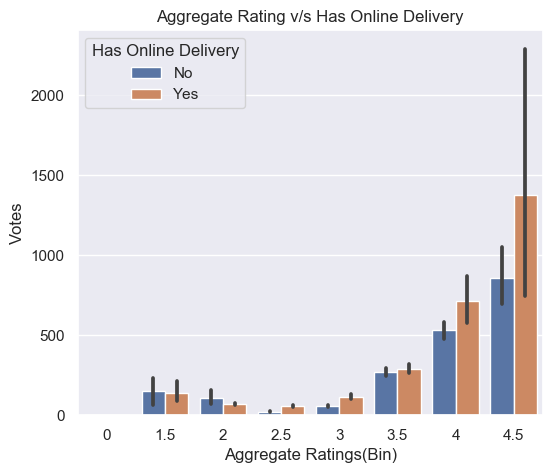

In [239]:
fig,ax =plt.subplots(figsize=(6,5))
ax= sns.barplot(data = zomato_data, x = 'rating_bin', y='votes', hue='has_online_delivery')
ax.legend(title="Has Online Delivery" )
ax.set(xlabel='Aggregate Ratings(Bin)', ylabel='Votes')
plt.title('Aggregate Rating v/s Has Online Delivery')
plt.show()

## 5. Conclusion 
- Zomato has it’s major grip on Northern part of India — majorly __New Delhi, Gurgaon and Noida.__
- The most ordered cuisine are the Indian  and Chinese cuisine but the highly voted cuisine are __the American and Italian__ ones which can be a strong area for Zomato to grow.
- People rate majority restaurants as __Average or have Not Rated__ so this can not be considered as a strong factor to discuss the success of a restaurant.
- Restaurants which provide services like Booking table online and Ordering online can have a higher chance of success compared to others.
